# **Question 1**

### 1.	Use TensorFlow to train a simple one neuron model to classify the below patterns. You can use any activation function, optimizer, and loss function. Plot loss parameter from the history. Print prediction for all the patterns.

# Import Necessary Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Dataset preparation

In [3]:
# Input data (X1, X2, X3)
X = np.array([[1, 1, 1],
              [1.5, 1.5, 1.2],
              [1.7, 2.1, 0.9],
              [1.4, 1.8, 1.1],
              [-2, -2, 5],
              [-2.1, -1.7, 5.5],
              [-2.5, -2.5, 6],
              [-1.7, -1.9, 5.8]])

# Target labels (1 or 0)
y = np.array([1, 1, 1, 1, 0, 0, 0, 0])

# Model Building

In [4]:
# Build a simple model with one neuron
model = Sequential([
    Dense(1, input_dim=3, activation='sigmoid')  # One neuron with sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model training

In [5]:
# Train the model and store the history
history = model.fit(X, y, epochs=100, verbose=0)  # You can adjust the number of epochs

# Plot Loss Function

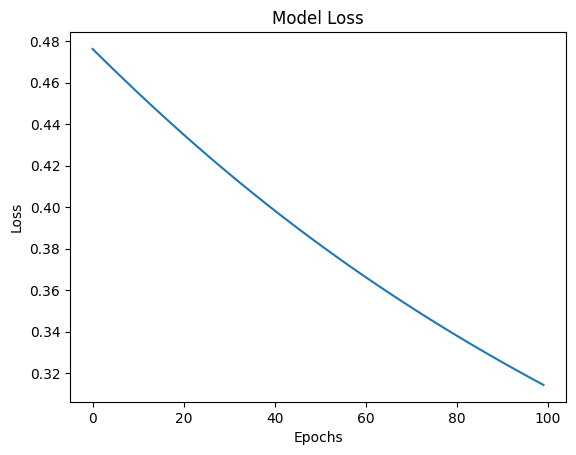

In [6]:
# Plot the loss curve
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predictions

In [7]:
# Make predictions on the input data
predictions = model.predict(X)
predictions = (predictions > 0.5).astype(int)  # Convert to binary classification (0 or 1)

# Print the predictions
print("Predictions for the input patterns:")
for i, prediction in enumerate(predictions):
    print(f"Pattern {i+1}: {prediction[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predictions for the input patterns:
Pattern 1: 1
Pattern 2: 1
Pattern 3: 1
Pattern 4: 1
Pattern 5: 0
Pattern 6: 0
Pattern 7: 0
Pattern 8: 0


# **Question 2**

### 2.	The purpose of this HW is for you to become familiar with tensorboard. Use TensorFlow to classify the Fashion MNIST dataset.  Visualize different clusters by using tensorboard. Your TA will provide you with the dataset.

#  Import required packages

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset

In [9]:
## Uploading the dataset
from google.colab import files
file_path = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv


In [11]:
## Uploading the dataset
from google.colab import files
file_path = files.upload()

Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [12]:
# Load CSV files
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Preprocess the dataset

In [14]:

# Split features and labels
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalize pixel values (0 to 255) to (0 to 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for the neural network input (28x28 images)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#  Build the TensorFlow model

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# TensorBoard setup

In [17]:
# Load TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model and visualize using TensorBoard

In [19]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9541 - loss: 0.1196 - val_accuracy: 0.9134 - val_loss: 0.2609
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 119s 37ms/step - accuracy: 0.9608 - loss: 0.1070 - val_accuracy: 0.9198 - val_loss: 0.2694
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9624 - loss: 0.0999 - val_accuracy: 0.9161 - val_loss: 0.3010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9633 - loss: 0.0957 - val_accuracy: 0.9168 - val_loss: 0.2874
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - accuracy: 0.9700 - loss: 0.0823 - val_accuracy: 0.9152 - val_loss: 0.3125
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 39ms/step - accuracy: 0.9697 - loss: 0.0791 - val_accuracy: 0.9185 - val_loss: 0.3255
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - accuracy: 0.9720 - loss: 0.0745 - val_accuracy: 0.9139 - val_loss: 0.3585
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9749 

# Visualize clusters in TensorBoard

In [22]:
!pip install tensorboard

In [23]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 58855), started 0:00:27 ago. (Use '!kill 58855' to kill it.)

<IPython.core.display.Javascript object>

#